# DICOM
This is just a basic understaing on DICOM, as I feel before working on any dataset we should have a basic understanding on the data source, data format and the features. With this atleast one could start digging into more to get better understanding.

DICOM format is a new term for me, so tried getting more and more information. Thus wanted to share the information with you all. Please correct me if I miss any important aspect here.

Again the notebook is just to explore on DICOM. **We will also see how to convert the dicom to numpy array so that we as a ML Engineer / Data Science work on the dataset.**

# What is DICOM?
DICOM stands for **D**igital **I**maging and **Co**mmunications in **M**edicine.

DICOM is a clinical messaging syntax used to exchange medical images between medical equipment and information systems.

# Purpose 
As per Wikipedia... DICOM is most commonly used for storing and transmitting medical images enabling the integration of medical imaging devices such as scanners, servers, workstations, printers, network hardware, and **P**icture **A**rchiving and **C**ommunication **S**ystems (PACS) from multiple manufacturers.

Today, DICOM is used worldwide to store, exchange and transmit medical images, enabling the integration of medical imaging devices from multiple manufacturers. Patient data and related images are exchanged and stored in a standardized format.

# Is DICOM secure?
Dicom system offers encryption for all outgoing and incoming traffic. Secure DICOM communication according to Supplement 31, based on the Transport Layer Security (TLS) protocol standard.

Refer https://dcmsys.com/project/dicom-encryption-anonymization/ for ful details.

# What is a DICOM Image File?
A DICOM image file is an outcome of the Digital Imaging and Communications in Medicine standard.

A DICOM image file is an outcome of the Digital Imaging and Communications in Medicine standard. Specifically, image files that are compliant with part 10 of the DICOM standard are generally referred to as “DICOM format files” or simply “DICOM files” and are represented as “.dcm.”

> **DICOM differs from other image formats in that it groups information into data sets. A DICOM file consists of a header and image data sets, all packed into a single file.**

These data are stored as a long series of 0s and 1s, which can be reconstructed as the image by using the information from the header.

The DICOM medical file of a single patient consists of multiple images, all of which are of high resolution. Therefore, the file size can be quite large (for instance, a single CT scan can run up to 35 MB).

# Other Image file format

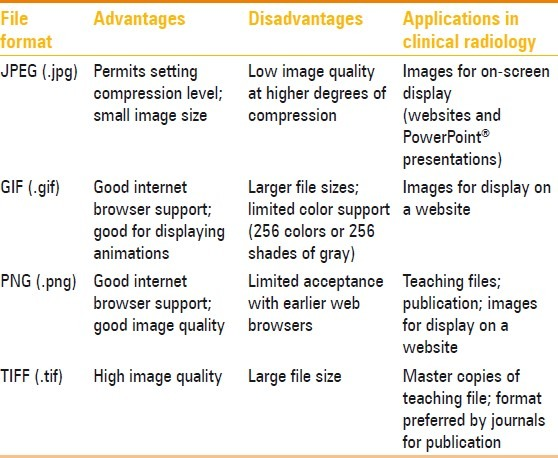

# How can I Convert DICOM Images into Other File Formats?
Conversion of DICOM images into other formats is most often performed at a diagnostic workstation or at a Web client of a PACS system. Most of these systems have an “export” function that enables the operator to save the image displayed in the active window as a JPEG or TIFF file. While some applications permit export of a batch of DICOM images into other formats, most require repeated operations, converting one image at a time.

Several image management software packages that permit easy screen capture (such as IrfanView and XnView) are available for free download. 



# Convert the dicom images to numpy array

* Python has a library called `pydicom` which is is a pure python package for parsing DICOM files. https://pypi.org/project/pydicom/0.9.7/ 


In [ ]:
# Import Library.
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_voi_lut

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Let read one Image
dicom_image = '../input/vinbigdata-chest-xray-abnormalities-detection/train/00053190460d56c53cc3e57321387478.dicom'

In [ ]:
# Read the file
dicom = pydicom.read_file(dicom_image)
dicom

Now lets apply the method `apply_voi_lut` available in pydicom package.

Apply a VOI lookup table or windowing operation to arr.

https://pydicom.github.io/pydicom/dev/reference/generated/pydicom.pixel_data_handlers.apply_voi_lut.html 

There are other method and depending on the dataset type you may need to use `apply_modality_lut()` beforehand (When the dataset requires a modality LUT or rescale operation as part of the Modality LUT module then that must be applied before any windowing operation).

In [ ]:
data_voi = apply_voi_lut(dicom.pixel_array, dicom)
data_voi

In [ ]:
data = dicom.pixel_array
data

## Photometric Interpretation Attribute
Specifies the intended interpretation of the pixel data.

https://dicom.innolitics.com/ciods/vl-endoscopic-image/vl-image/00280004

Enumerated Values:

* MONOCHROME2
* RGB
* YBR_FULL_422
* YBR_PARTIAL_420
* YBR_RCT
* YBR_ICT

In [ ]:
dicom.PhotometricInterpretation

In [ ]:
data_voi = data_voi - np.min(data_voi)
data_voi = data_voi / np.max(data_voi)
data_voi = (data_voi * 255).astype(np.uint8)
data_voi

# Visualize

In [ ]:
plt.figure(figsize = (12,12))
plt.imshow(data_voi, 'gray')

# References
https://people.cas.sc.edu/rorden/dicom/index.html

https://dcmsys.com/project/dicom-encryption-anonymization/

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3354356/

https://www.neologica.it/eng/tutorial/tutorialdicom

https://pypi.org/project/pydicom/0.9.7/

https://stackoverflow.com/questions/60219622/python-convert-dcm-to-png-images-are-too-bright/60220507#60220507

https://dicom.innolitics.com/ciods/vl-endoscopic-image/vl-image/00280004


Happy learning...